In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd

In [16]:
import datetime as dt

In [17]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [18]:
 engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [19]:
# Reflect an Existing Database into a New Model
Base = automap_base()

# Reflect the Tables 
Base.prepare(engine, reflect=True)

In [20]:
# We Can View All of the Classes that Automap Found 
Base.classes.keys()

['measurement', 'station']

In [21]:
# Save References to each Table 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [22]:
# Create Our Session (Link) from Python to the DB
Session = Session(engine)

Last Date of Dataset Is: ('2017-08-23',)
Date 1 Year Ago Was: 2016-08-23


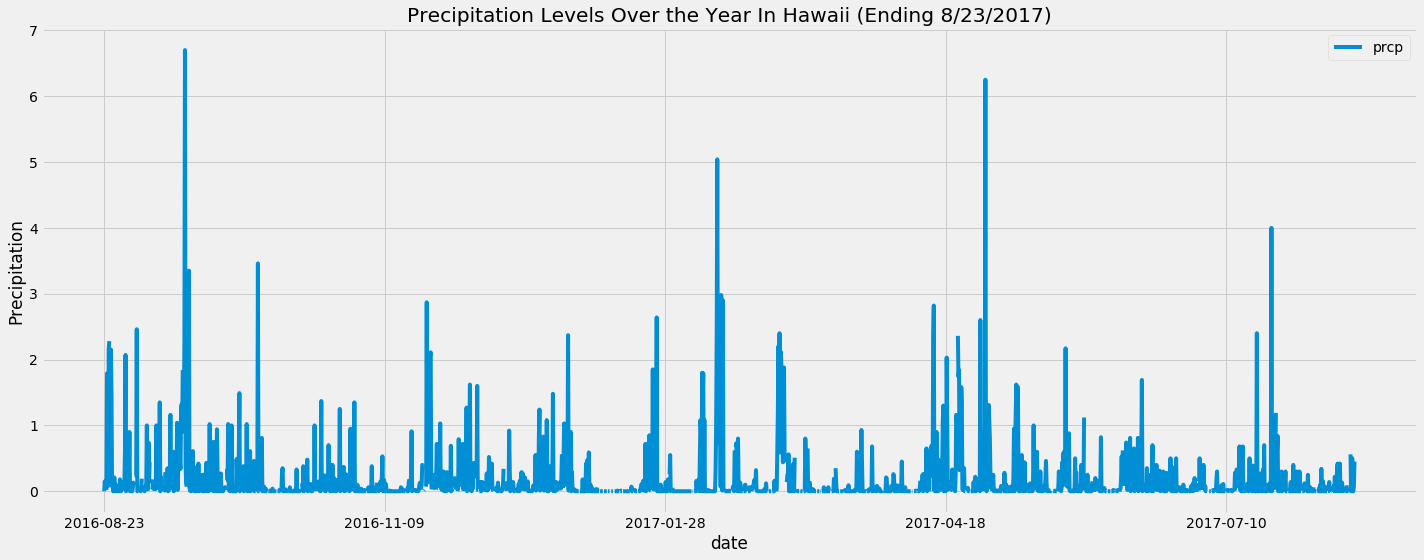

In [42]:
# Exploratory Climate Analysis
# Design a Query to Retrieve the Last 12 Months of Precipitation Data and Plot the Results 
last_twelve_months = Session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'Last Date of Dataset Is: {last_twelve_months}')

# Calculate the Date 1 Year Ago from the Last Data Point in the Database
one_year_ago = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(f'Date 1 Year Ago Was: {one_year_ago}')

# Perform a Query to Retrieve the Data and Precipitation Scores
prcp_scores = Session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).\
    order_by(Measurement.date).all() # Sort the Dataframe by Date 
prcp_df = pd.DataFrame(prcp_scores).set_index('date')

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df = pd.DataFrame(prcp_scores).set_index('date')
prcp_df.head()

# Use Pandas Plotting with Matplotlib to Plot the Data
prcp_df.plot(figsize = (20,8))
plt.title("Precipitation Levels Over the Year In Hawaii (Ending 8/23/2017)")
plt.ylabel('Precipitation')
plt.tight_layout()
plt.show()

In [29]:
 # Use Pandas to Calcualte the Summary Statistics for the Precipitation Data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [30]:
# Design a Query to Show How Many Stations are Available in this Dataset?
station = Session.query(func.count(Measurement.station.distinct())).all()
print(f'There are {station} stations.')

There are [(9,)] stations.


In [32]:
# What are the Most Active Stations? (i.e. What Stations Have the Most Rows)?
active = [Measurement.station,
      func.count(Measurement.station)]
active_station = Session.query(*active).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all() # List the Stations and the Counts in Descending Order.
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the Station ID from the Previous Query, Calculate the Lowest Temperature Recorded, 
# Highest Temperature Recorded, and Average Temperature of the Most Active Station?
active2 = [func.min(Measurement.tobs),
           func.max(Measurement.tobs),
           func.avg(Measurement.tobs)]

Session.query(*active2).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

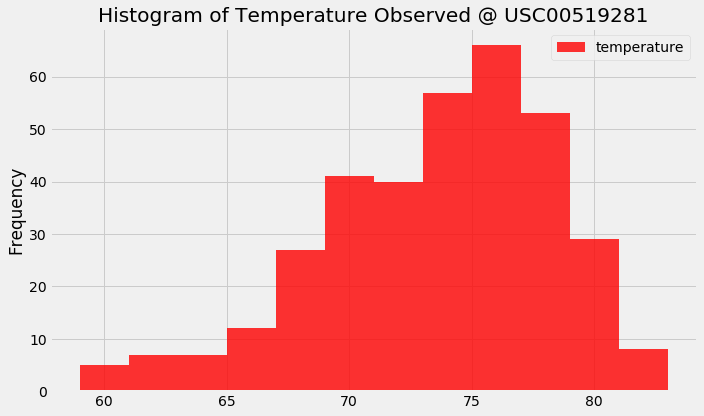

In [39]:
# Choose the Station with the Highest Number of Temperature Observations.
highest_station = Session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
highest_station = highest_station[0]

# Query the Last 12 Months of Temperature Observation Data for this Station and Plot the Results as a Histogram
observation = Session.query( Measurement.tobs).filter(Measurement.date >= one_year_ago).filter(Measurement.station == highest_station).all()
observation = pd.DataFrame(observation, columns=["temperature"])
observation.plot.hist(bins=12, title="Histogram of Temperature Observed @ USC00519281",color="red", alpha=0.8, figsize=(10,6))
plt.tight_layout()
plt.style.use('fivethirtyeight')
plt.show()

In [41]:
# This Function Called `calc_temps` will Accept Start Date and End Date in the Format '%Y-%m-%d' 
# and Return the Minimum, Average, and Maximum Temperatures for that Range of Dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return Session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Function Usage Example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]
